In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import cluster, datasets,metrics

AMOSTRAS = 50

np.random.seed(12)
# criando o conjunto de dados de bolinhas
bolinhas,_ = datasets.make_blobs(n_samples=AMOSTRAS, random_state=15, centers=[(1,1),(5,5)],cluster_std=0.8)

# transformando o conjunto em um dataframe para facilitar sua manipulação
bolinhas = pd.DataFrame(bolinhas,columns = ['feature1','feature2'])

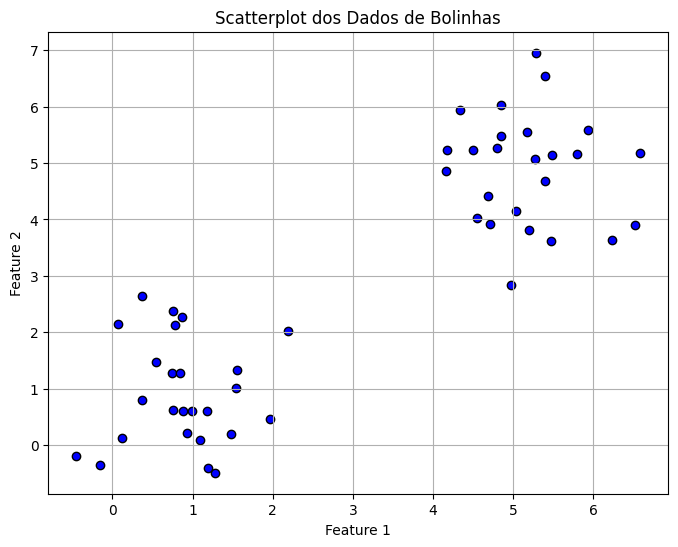

In [3]:
# Criando o scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(bolinhas['feature1'], bolinhas['feature2'], c='blue', marker='o', edgecolor='k')
plt.title('Scatterplot dos Dados de Bolinhas')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Número de dados em cada cluster:
[25 25]


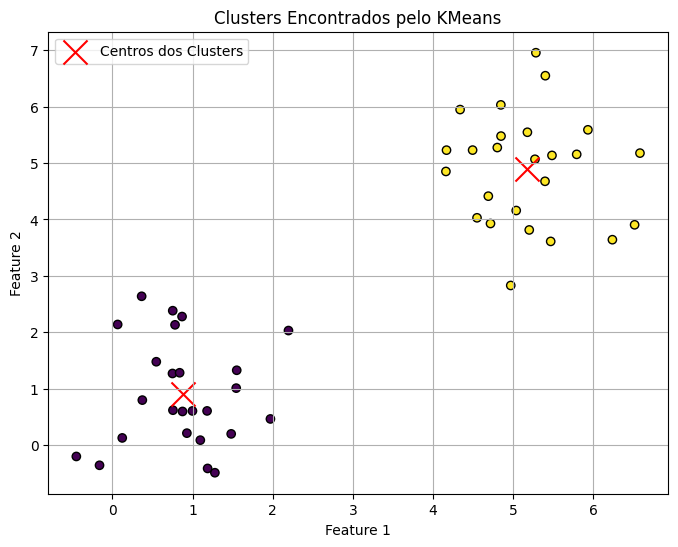

In [14]:
kmeans = cluster.KMeans(n_clusters = 2, random_state = 12)
kmeans.fit(bolinhas)

# Obtendo os rótulos dos clusters
labels = kmeans.labels_

# Obtendo as coordenadas dos centros dos clusters
centers = kmeans.cluster_centers_

# Contando o número de dados em cada cluster
cluster_counts = np.bincount(labels)

# Exibindo a contagem de dados em cada cluster
print("Número de dados em cada cluster:")
print(cluster_counts)

# Criando o scatterplot dos dados e dos clusters encontrados
plt.figure(figsize=(8, 6))
plt.scatter(bolinhas['feature1'], bolinhas['feature2'], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='x', label='Centros dos Clusters')
plt.title('Clusters Encontrados pelo KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#outra forma de contar os clusters

# Contando o número de dados em cada cluster
cluster_counts = pd.Series(labels).value_counts()

# Exibindo a contagem de dados em cada cluster
print("Número de dados em cada cluster:")
print(cluster_counts)

Número de dados em cada cluster:
1    25
0    25
Name: count, dtype: int64


In [16]:
from sklearn.metrics import pairwise_distances

# Calculando a matriz de distâncias
distances = pairwise_distances(bolinhas)

# Função para calcular o coeficiente de silhueta para uma observação específica
def silhuette_score(i, distances, labels):
    # Identificar o cluster da observação i
    cluster_i = labels[i]
    
    # Pontos do mesmo cluster
    same_cluster = (labels == cluster_i)
    
    # Distâncias médias para pontos no mesmo cluster (a)
    a_i = np.mean(distances[i, same_cluster])
    
    # Distâncias médias para pontos em outros clusters
    other_clusters = ~same_cluster
    b_i = np.inf
    for cluster_label in np.unique(labels):
        if cluster_label != cluster_i:
            cluster_points = (labels == cluster_label)
            distance_to_cluster = np.mean(distances[i, cluster_points])
            b_i = min(b_i, distance_to_cluster)
    
    # Coeficiente de Silhueta
    silhuette = (b_i - a_i) / max(a_i, b_i)
    return silhuette

# Calcular o coeficiente de silhueta para a primeira observação
silhouette_value = silhuette_score(0, distances, labels)
print(f'Coeficiente de Silhueta para a primeira observação: {silhouette_value:.4f}')

Coeficiente de Silhueta para a primeira observação: 0.7108


In [17]:
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score

# Calculando os coeficientes de silhueta para cada ponto
silhouette_values = silhouette_samples(bolinhas, labels)

# Calculando a média dos coeficientes de silhueta
mean_silhouette_value = np.mean(silhouette_values)
print(f'Média dos coeficientes de silhueta: {mean_silhouette_value:.4f}')

# Calculando o coeficiente de silhueta geral
overall_silhouette_score = silhouette_score(bolinhas, labels)
print(f'Coeficiente de silhueta geral: {overall_silhouette_score:.4f}')

Média dos coeficientes de silhueta: 0.7499
Coeficiente de silhueta geral: 0.7499


In [19]:
AMOSTRAS = 500

np.random.seed(12)
bolinhas,_ = datasets.make_blobs(n_samples=AMOSTRAS, random_state=15, centers=[(1,1),(1.5,1.5)],cluster_std=0.2)
bolinhas = pd.DataFrame(bolinhas,columns = ['feature1','feature2'])

In [20]:
kmeans = cluster.KMeans(n_clusters = 2, random_state = 12)
kmeans.fit(bolinhas)

# Obtendo os rótulos dos clusters
labels = kmeans.labels_

# Calculando o coeficiente de silhueta geral
overall_silhouette_score = silhouette_score(bolinhas, labels)
print(f'Coeficiente de silhueta geral: {overall_silhouette_score:.4f}')

Coeficiente de silhueta geral: 0.5350


In [21]:
AMOSTAS = 500

np.random.seed(12)
bolinhas,_ = datasets.make_blobs(n_samples=AMOSTAS, random_state=15, centers=[(1,1),(1.1,1.1)],cluster_std=0.2)
bolinhas = pd.DataFrame(bolinhas,columns = ['feature1','feature2'])

kmeans = cluster.KMeans(n_clusters = 2, random_state = 12)
kmeans.fit(bolinhas)

# Obtendo os rótulos dos clusters
labels = kmeans.labels_

# Calculando o coeficiente de silhueta geral
overall_silhouette_score = silhouette_score(bolinhas, labels)
print(f'Coeficiente de silhueta geral: {overall_silhouette_score:.4f}')

Coeficiente de silhueta geral: 0.3245


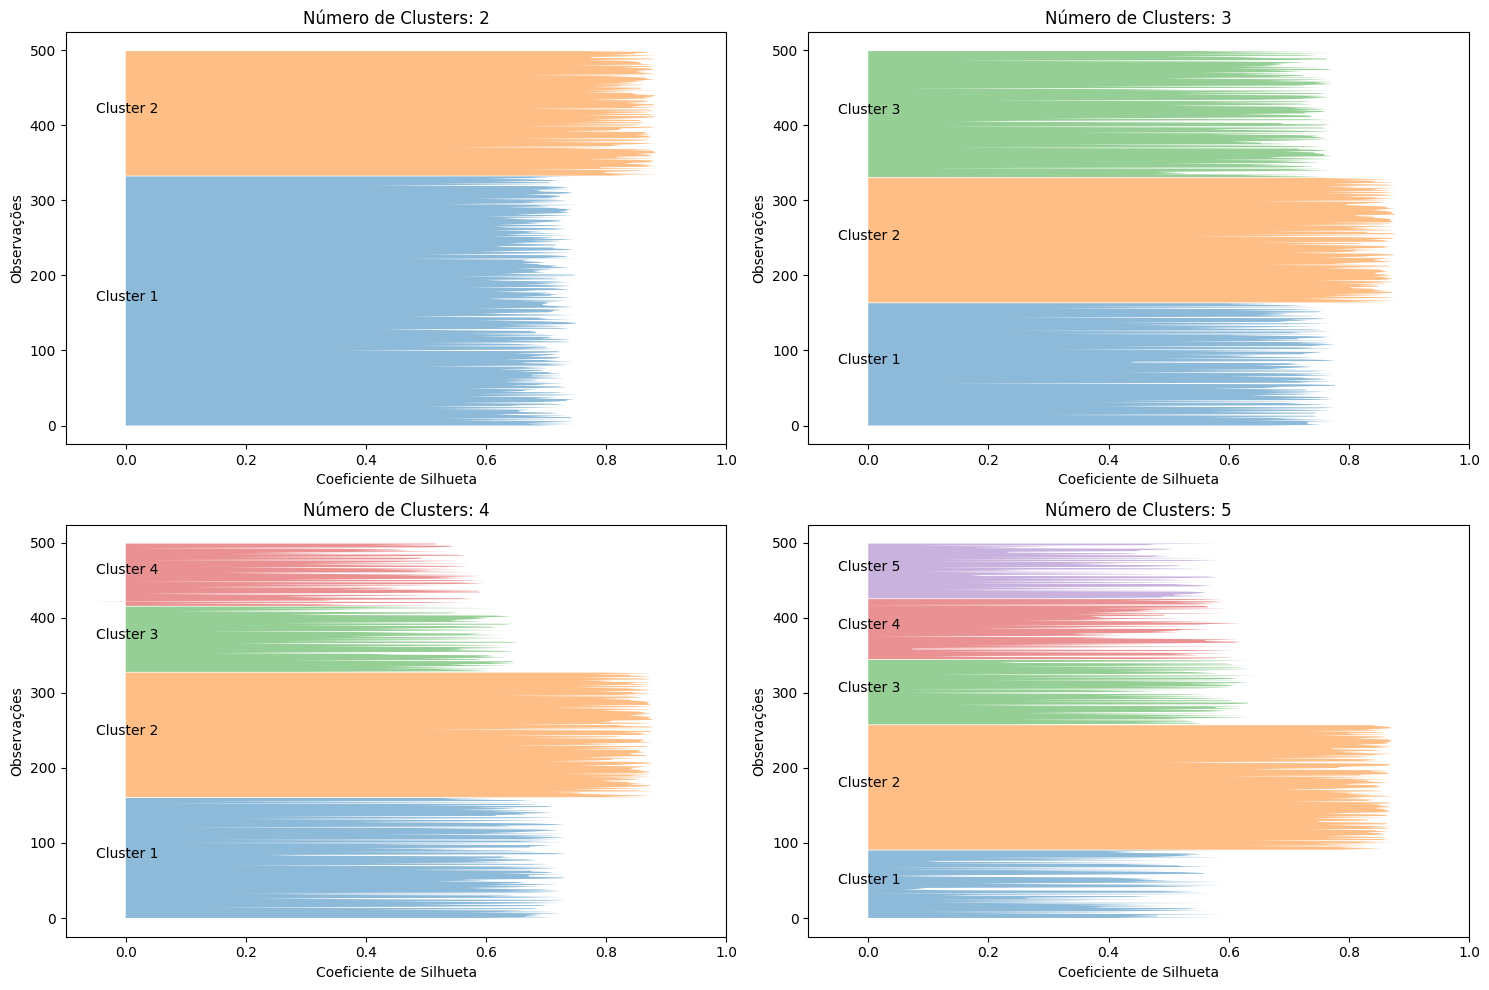

In [22]:
from sklearn.preprocessing import StandardScaler

# Gerando o conjunto de dados com 3 clusters esféricos
AMOSTAS = 500
np.random.seed(12)
bolinhas, _ = datasets.make_blobs(n_samples=AMOSTAS, random_state=15, centers=3)
bolinhas = pd.DataFrame(bolinhas, columns=['feature1', 'feature2'])

# Padronizar os dados
scaler = StandardScaler()
bolinhas_scaled = scaler.fit_transform(bolinhas)

# Função para plotar o gráfico de silhueta
def plot_silhouette(n_clusters, data, labels, ax):
    # Calcular os coeficientes de silhueta
    silhouette_vals = silhouette_samples(data, labels)
    
    # Ordenar os coeficientes de silhueta
    sorted_idx = np.argsort(labels)
    sorted_vals = silhouette_vals[sorted_idx]
    sorted_labels = labels[sorted_idx]

    # Plotar gráfico de silhueta
    ax.set_xlim([-0.1, 1])
    y_lower, y_upper = 0, 0
    for i in range(n_clusters):
        cluster_vals = sorted_vals[sorted_labels == i]
        y_upper += len(cluster_vals)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, alpha=0.5)
        ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {i+1}')
        y_lower += len(cluster_vals)
    
    ax.set_title(f'Número de Clusters: {n_clusters}')
    ax.set_xlabel('Coeficiente de Silhueta')
    ax.set_ylabel('Observações')

# Número de clusters a serem considerados
n_clusters_list = [2, 3, 4, 5]

# Plotar os gráficos de silhueta
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, n_clusters in zip(axes.flatten(), n_clusters_list):
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=12)
    labels = kmeans.fit_predict(bolinhas_scaled)
    plot_silhouette(n_clusters, bolinhas_scaled, labels, ax)

plt.tight_layout()
plt.show()


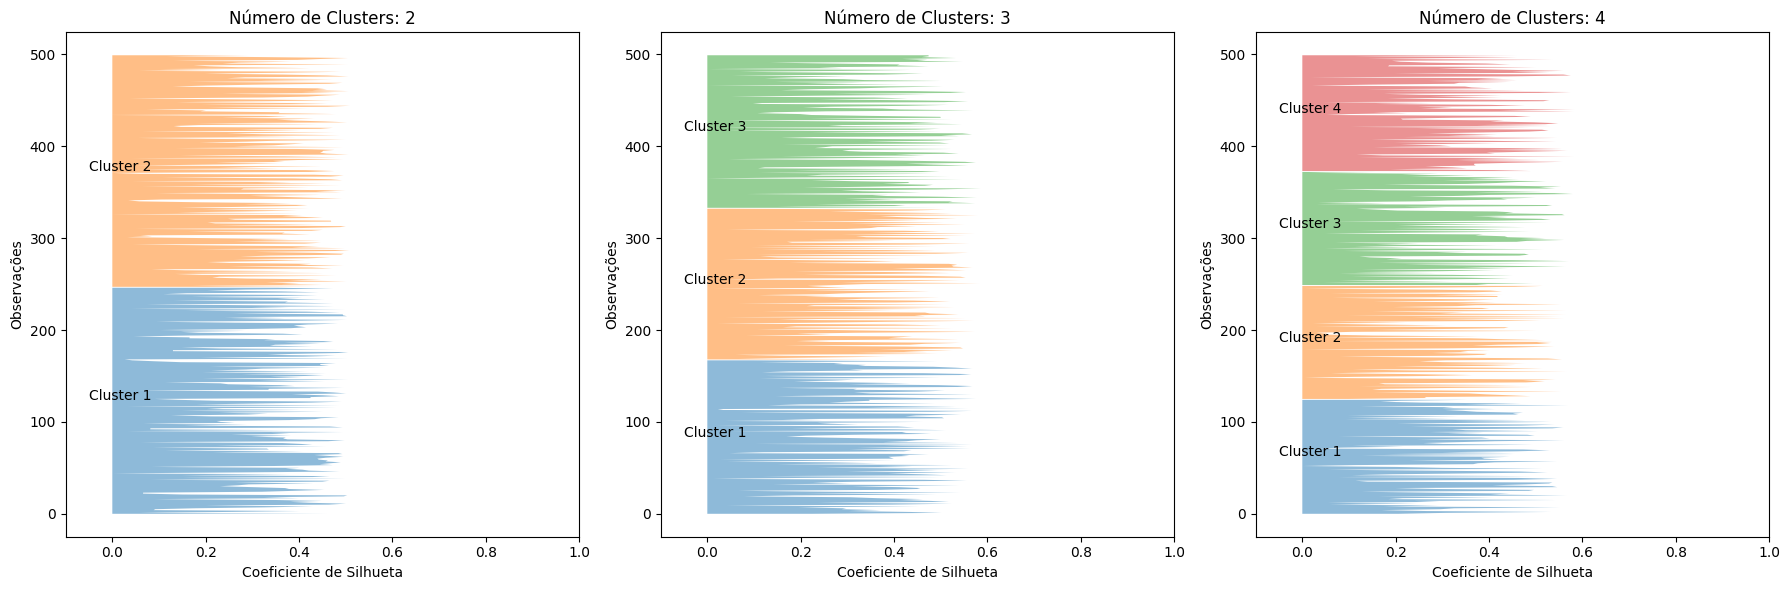

Coeficiente de silhueta geral para 2 clusters: 0.3267


In [23]:
# Gerar o conjunto de dados com clusters circulares
AMOSTAS = 500
np.random.seed(12)
circulos, _ = datasets.make_circles(n_samples=AMOSTAS, factor=0.4, noise=0.07, random_state=12)
circulos = pd.DataFrame(circulos, columns=['feature1', 'feature2'])

# Padronizar os dados
scaler = StandardScaler()
circulos_scaled = scaler.fit_transform(circulos)

# Função para plotar o gráfico de silhueta
def plot_silhouette(n_clusters, data, labels, ax):
    silhouette_vals = silhouette_samples(data, labels)
    
    # Ordenar os coeficientes de silhueta
    sorted_idx = np.argsort(labels)
    sorted_vals = silhouette_vals[sorted_idx]
    sorted_labels = labels[sorted_idx]

    # Plotar gráfico de silhueta
    ax.set_xlim([-0.1, 1])
    y_lower, y_upper = 0, 0
    for i in range(n_clusters):
        cluster_vals = sorted_vals[sorted_labels == i]
        y_upper += len(cluster_vals)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, alpha=0.5)
        ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {i+1}')
        y_lower += len(cluster_vals)
    
    ax.set_title(f'Número de Clusters: {n_clusters}')
    ax.set_xlabel('Coeficiente de Silhueta')
    ax.set_ylabel('Observações')

# Número de clusters a serem considerados
n_clusters_list = [2, 3, 4]

# Plotar os gráficos de silhueta
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, n_clusters in zip(axes, n_clusters_list):
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=12)
    labels = kmeans.fit_predict(circulos_scaled)
    plot_silhouette(n_clusters, circulos_scaled, labels, ax)

plt.tight_layout()
plt.show()

# Calculando e exibindo o coeficiente de silhueta geral para o melhor número de clusters (geralmente o que tem a maior média)
best_n_clusters = 2
kmeans_best = cluster.KMeans(n_clusters=best_n_clusters, random_state=12)
labels_best = kmeans_best.fit_predict(circulos_scaled)
overall_silhouette_score = silhouette_score(circulos_scaled, labels_best)
print(f'Coeficiente de silhueta geral para {best_n_clusters} clusters: {overall_silhouette_score:.4f}')


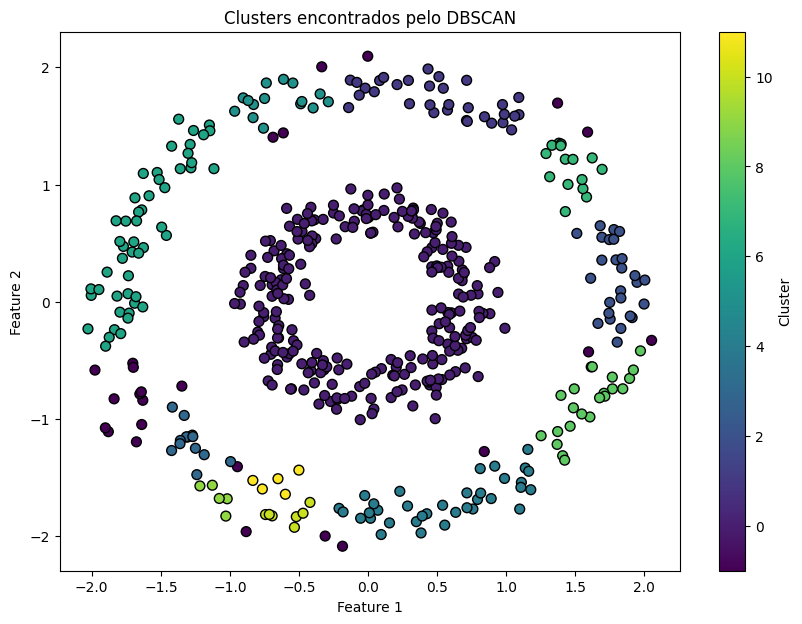

In [24]:
from sklearn.cluster import DBSCAN

# Definir e ajustar o modelo DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(circulos_scaled)

# Plotar os dados coloridos de acordo com o cluster
plt.figure(figsize=(10, 7))
plt.scatter(circulos_scaled[:, 0], circulos_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters encontrados pelo DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [25]:
# Calculando o coeficiente de silhueta geral
overall_silhouette_score = silhouette_score(circulos_scaled, labels)
print(f'Coeficiente de silhueta geral: {overall_silhouette_score:.4f}')

Coeficiente de silhueta geral: 0.2076


In [27]:
AMOSTAS = 500

np.random.seed(12)

bolinhas,_ = datasets.make_blobs(n_samples=AMOSTAS, random_state=15)
bolinhas = pd.DataFrame(bolinhas,columns = ['feature1','feature2'])

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

kmeans = cluster.KMeans(n_clusters = 3, random_state = 12)
kmeans.fit(bolinhas)

# Padronizar os dados
scaler = StandardScaler()
bolinhas_scaled = scaler.fit_transform(bolinhas)

# Aplicar o KMeans com n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=12)
labels = kmeans.fit_predict(bolinhas_scaled)

# Calculando o score de Calinski Harabasz
calinski_harabasz = calinski_harabasz_score(bolinhas_scaled, labels)
print(f'O score de Calinski Harabasz é {calinski_harabasz:.4f}')

O score de Calinski Harabasz é 3638.0778


In [34]:
AMOSTAS = 50000

np.random.seed(12)
bolinhas,_ = datasets.make_blobs(n_samples=AMOSTAS, random_state=15, centers=[(1,1),(1.1,1.1)],cluster_std=0.2)
bolinhas = pd.DataFrame(bolinhas,columns = ['feature1','feature2'])

In [35]:
kmeans = cluster.KMeans(n_clusters = 3, random_state = 12)
kmeans.fit(bolinhas)

# Padronizar os dados
scaler = StandardScaler()
bolinhas_scaled = scaler.fit_transform(bolinhas)

# Aplicar o KMeans com n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=12)
labels = kmeans.fit_predict(bolinhas_scaled)

# Calculando o score de Calinski Harabasz
calinski_harabasz = calinski_harabasz_score(bolinhas_scaled, labels)
print(f'O score de Calinski Harabasz é {calinski_harabasz:.4f}')

O score de Calinski Harabasz é 28915.2027


In [36]:
AMOSTAS = 500

np.random.seed(12)
bolinhas,_ = datasets.make_blobs(n_samples=AMOSTAS, random_state=15)
bolinhas = pd.DataFrame(bolinhas,columns = ['feature1','feature2'])

def k_means_CH(dados,max_clust=6):
    """
    Executa o método k-means max_clust vezes, calcula o índice de Calinski-Harabasz e apresenta o gráfico dos scores.
    
    Args:
        * dados - np.array: dados em 2 dimensões contendo duas features de interesse.
        * max_clust - inteiro: número máximo de vezes que o k-means será computado e o score de Calinski-Harabasz
        será computado
    """
    ch_score = {}
    
    for n_clust in range(2,max_clust):
       
        _, label, _ = cluster.k_means(dados,n_clusters = n_clust , random_state = 5)
        
        ch_score[n_clust] = metrics.calinski_harabasz_score(dados, label)
    
    for n_clusters, CH_score in ch_score.items():
         
            print('Para',n_clusters,'clusters temos um CH score de:', CH_score)
    
    plt.plot(list(ch_score.keys()), list(ch_score.values()))
    plt.xlabel('Número de Clusters')
    plt.ylabel('Indice Calinski Harabasz')
    plt.title('Calinski Harabasz - Melhor Número de Clusters')
    plt.show()

Para 2 clusters temos um CH score de: 3336.3782770418907
Para 3 clusters temos um CH score de: 6652.265417638204
Para 4 clusters temos um CH score de: 5063.417539172211
Para 5 clusters temos um CH score de: 4477.478730284872
Para 6 clusters temos um CH score de: 3956.036453129991
Para 7 clusters temos um CH score de: 3733.71706223722
Para 8 clusters temos um CH score de: 3969.27016152968
Para 9 clusters temos um CH score de: 3878.231962272992


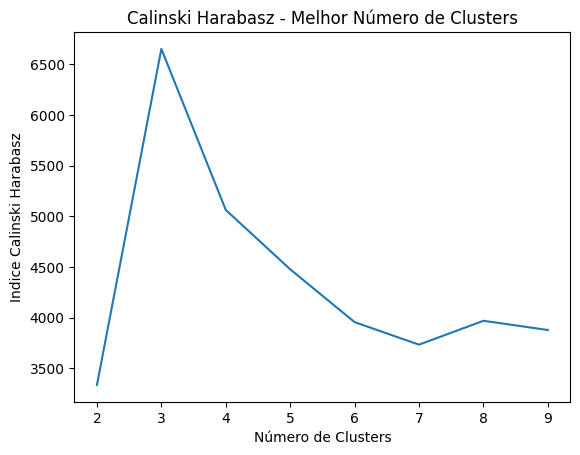

In [37]:
k_means_CH(bolinhas,10)

Para 2 clusters temos um CH score de: 4207.310862056993
Para 3 clusters temos um CH score de: 5130.66862050101
Para 4 clusters temos um CH score de: 4300.329427350561
Para 5 clusters temos um CH score de: 4513.423264531771
Para 6 clusters temos um CH score de: 5916.182482584407
Para 7 clusters temos um CH score de: 5767.042228052574
Para 8 clusters temos um CH score de: 5507.542019390019
Para 9 clusters temos um CH score de: 5849.322356408903


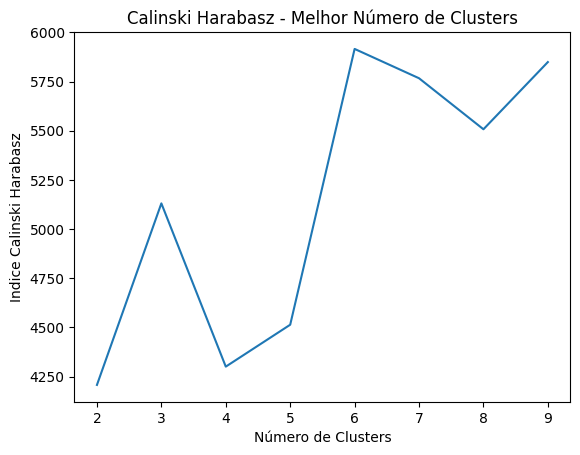

In [38]:
X_aux, y_aux = datasets.make_blobs(n_samples=AMOSTAS, random_state=42)
transf = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(X_aux, transf)

k_means_CH(aniso,10)

In [46]:
AMOSTAS = 500

np.random.seed(12)

bolinhas,_ = datasets.make_blobs(n_samples=AMOSTAS, random_state=15)
bolinhas = pd.DataFrame(bolinhas,columns = ['feature1','feature2'])

X_aux, y_aux = datasets.make_blobs(n_samples=AMOSTAS, random_state=42)
transf = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(X_aux, transf)

In [47]:
kmeans = cluster.KMeans(n_clusters = 3, random_state = 12)
kmeans.fit(bolinhas)

# Obtendo os rótulos dos clusters
labels = kmeans.labels_

# Calculando o coeficiente de silhueta geral
overall_silhouette_score = silhouette_score(bolinhas, labels)
print(f'Coeficiente de silhueta geral: {overall_silhouette_score:.4f}')

Coeficiente de silhueta geral: 0.7404


In [48]:
from sklearn.metrics import davies_bouldin_score

# Calcular o score Davies-Bouldin
davies_bouldin = davies_bouldin_score(bolinhas, labels)
print(f'Score Davies-Bouldin: {davies_bouldin:.4f}')

Score Davies-Bouldin: 0.3615


In [49]:
kmeans = cluster.KMeans(n_clusters = 3, random_state = 12)
kmeans.fit(aniso)

# Obtendo os rótulos dos clusters
labels = kmeans.labels_

# Calculando o coeficiente de silhueta geral
overall_silhouette_score = silhouette_score(aniso, labels)
print(f'Coeficiente de silhueta geral: {overall_silhouette_score:.4f}')

Coeficiente de silhueta geral: 0.6924


In [50]:
from sklearn.metrics import davies_bouldin_score

# Calcular o score Davies-Bouldin
davies_bouldin = davies_bouldin_score(aniso, labels)
print(f'Score Davies-Bouldin: {davies_bouldin:.4f}')

Score Davies-Bouldin: 0.4624


In [51]:
AMOSTAS = 5000

np.random.seed(12)

bolinhas,_ = datasets.make_blobs(n_samples=AMOSTAS, random_state=15)
bolinhas = pd.DataFrame(bolinhas,columns = ['feature1','feature2'])

In [56]:
kmeans = cluster.KMeans(n_clusters = 3, random_state = 12)
kmeans.fit(bolinhas)

# Obtendo os rótulos dos clusters
labels = kmeans.labels_

In [57]:
%%timeit
metrics.silhouette_score(bolinhas, labels)

387 ms ± 29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
%%timeit
metrics.davies_bouldin_score(bolinhas, labels)

1.75 ms ± 117 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
